# Figure 18: Gravitational reaccretion

## Estimates of gravitational re-accretion in collapsed vapor plume



In [1]:
import numpy as np
import matplotlib.pyplot as plt

params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (8, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

The self-gravitational collapse criteria is given by Equation 15 from {cite}`Choksi_2021`:

$R_{\rm Jeans}\sim \frac{c_{\rm neb} \left( 1+ \rho_{\rm particles}/\rho_{\rm gas} \right)^{-1/2}}{\sqrt{G (\rho_{\rm gas}+\rho_{\rm particles}) }}$


Here, we consider the number density of particles a free parameter, given in terms of $\rho_{\rm particles}/\rho_{\rm gas}$.

We use a reference gas density of $\rho_{\rm gas}=10^{-7}$ kg/m$^3$, dusty gas sound speed of $c_{\rm neb}\sim500$ m/s, and G is 6.67E-11 N m$^2$ kg$^{-2}$. To convert the cloud mass to a new planetesimal radius, we use a bulk density of $\rho_{\rm solid}=3000$ kg/m$^3$.

The particles dominate the bulk mass, and the free fall time of the cloud is

$t_{\rm ff} = \frac{1}{\sqrt{G \rho_{\rm particles}}}$

The radius of the new aggregate is

$R_{\rm new} = \left( \frac{R_{\rm Jeans}^3 \rho_{\rm particles}} {\rho_{\rm solid}} \right)^{1/3}$

For a reference chondrule particle mass density, if the number of chondrules per cubic meter is 100, with a radius of 0.5 mm (for chondrule+associated matrix) and a solid density of 3000 kg/m$^3$, the equivalent $\rho_{\rm particles}=1.57\times10^{-4}$ kg/m$^3$, and $\rho_{\rm particles}/\rho_{\rm gas}=1570$.

In [2]:
G = 6.67e-11 # N m2 /kg^2
cneb = 500 # m/s
rho_gas = 1.e-7 # kg/m3
rho_solid = 3000 # kg/m3

partfactarr = np.arange(100000)+100 # vary rho_particles/rho_gas by 10^2 to 10^5
rho_particle = rho_gas*partfactarr # kg/m3

# calculate Jeans criteria
Rjeansarr = cneb*np.power((1+rho_particle/rho_gas),-.5) / (np.sqrt(G*(rho_gas+rho_particle))) # m

tff = 1/np.sqrt(G*rho_particle) # sec
mff = 4/3*3.14159*np.power(Rjeansarr,3)*rho_particle # kg mass of the cloud
newrparr = np.power(mff/(4*3.14159*rho_solid/3),1/3) # m radius of new body
newrparr2 = np.power(np.power(Rjeansarr,3)*rho_particle/rho_solid,1/3) # m radius of new body


In [3]:
# calculate rho_particles/rho_gas for 100 chondrules per cubic meter:
r=0.5e-3 # m
rho1 = 3000 # kg/m3
n = 100 # per m3
solid_rho = n*(4/3*3.14159*r*r*r*rho1)/1 # kg/m3
print(solid_rho,solid_rho/rho_gas)

0.0001570795 1570.795


In [4]:
# calculate rho_particles/rho_gas for 100 chondrules per cubic meter:
r=0.5e-3 # m
rho1 = 3000 # kg/m3
n = 1000 # per m3
solid_rho = n*(4/3*3.14159*r*r*r*rho1)/1 # kg/m3
print(solid_rho,solid_rho/rho_gas)

0.0015707949999999998 15707.949999999999


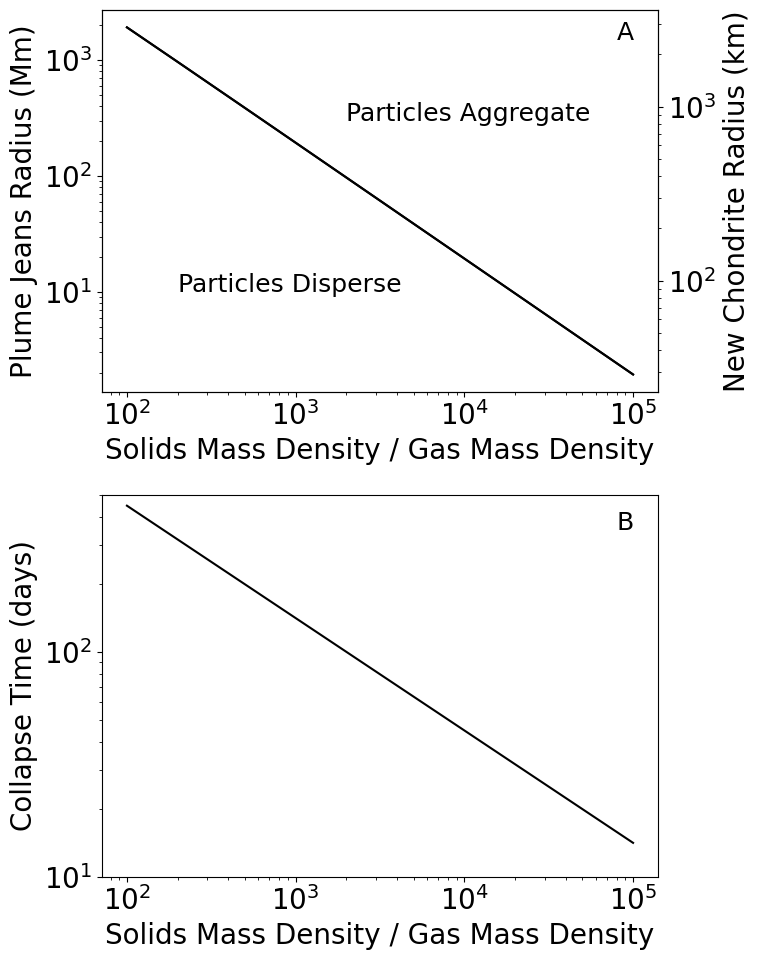

In [5]:
#fig, (ax0, ax1) = plt.subplots(2, 1) 
#ax01 = ax0.twinx() 

plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'font.size': 20})


fig, (ax0,ax1) = plt.subplots(2, 1,figsize=(8,10)) 
#ax2,ax1 = plt.subplots(1,2,figsize = (8, 6))
ax01 = ax0.twinx()
ax0.plot(partfactarr, Rjeansarr/1e6, color = 'k')
ax01.plot(partfactarr, newrparr/1.e3, color = 'k')
ax0.set_yscale('log')
ax01.set_yscale('log')
ax0.set_xscale('log')
# giving labels to the axises
ax0.set_xlabel('Solids Mass Density / Gas Mass Density')
ax0.set_ylabel('Plume Jeans Radius (Mm)', color = 'k')

# secondary y-axis label
ax01.set_ylabel('New Chondrite Radius (km)', color = 'k')
ax0.text(8.e4,1.5e3,'A',fontsize=18)
ax0.text(200,10,'Particles Disperse',fontsize=18)
ax0.text(2000,300,'Particles Aggregate',fontsize=18)

ax1.plot(partfactarr, tff/86400, color = 'k')
#ax2.plot(partfactarr, newrparr/1.e3, color = 'k')
ax1.set_yscale('log')
#ax2.set_yscale('log')
ax1.set_xscale('log')
# giving labels to the axises
ax1.set_xlabel('Solids Mass Density / Gas Mass Density')
ax1.set_ylabel('Collapse Time (days)', color = 'k')
ax1.set_ylim(10,500)
# secondary y-axis label
#ax2.set_ylabel('New Chondrite Radius (km)', color = 'k')

#ax2.set_yticks([0,1],labels=[' ',' '])
# defining display layout 
#plt.tight_layout()
ax1.text(8.e4,350,'B',fontsize=18)

# defining display layout 
plt.tight_layout()
plt.savefig('./plots/Fig18-Jeans-radius-new-radius-time-AB.pdf')
# show plot
plt.show()

In [6]:
# example given in text
print(np.interp(1570,partfactarr, Rjeansarr/1e6))


123.23410131482595
